In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import uuid
from datetime import datetime
from dotenv import load_dotenv
import boto3
from skimpy import generate_test_data, skim

# Configurações de visualização
%matplotlib inline
sns.set(style="whitegrid")

"""
Importa todas as bibliotecas necessárias para a análise exploratória, incluindo ferramentas para
redução de dimensionalidade e clustering.

Bibliotecas:
- pandas: Manipulação de dados
- numpy: Operações numéricas
- matplotlib: Visualização de dados
- seaborn: Visualização estatística
- os: Interação com o sistema operacional
- sklearn.decomposition.PCA: Análise de Componentes Principais
- sklearn.cluster.KMeans: Algoritmo de Clustering KMeans
- sklearn.preprocessing.StandardScaler: Escalonamento de dados
- boto3: Interação com AWS S3
"""

'\nImporta todas as bibliotecas necessárias para a análise exploratória, incluindo ferramentas para\nredução de dimensionalidade e clustering.\n\nBibliotecas:\n- pandas: Manipulação de dados\n- numpy: Operações numéricas\n- matplotlib: Visualização de dados\n- seaborn: Visualização estatística\n- os: Interação com o sistema operacional\n- sklearn.decomposition.PCA: Análise de Componentes Principais\n- sklearn.cluster.KMeans: Algoritmo de Clustering KMeans\n- sklearn.preprocessing.StandardScaler: Escalonamento de dados\n- boto3: Interação com AWS S3\n'

In [21]:
# Definir caminho do arquivo CSV
DATA_DIR = r'C:\Users\Inteli\Downloads\dados_cptm\caixa_preta'
csv_file = 'dmo_anl_vw_tipo_embarque.csv'

# Caminho completo para o arquivo CSV
csv_path = os.path.join(DATA_DIR, csv_file)

# Verificar se o arquivo CSV existe e carregá-lo
df = None  # Inicializar a variável df para evitar problemas caso o arquivo não exista
if os.path.exists(csv_path):
    # Carregar o arquivo CSV em um DataFrame
    df = pd.read_csv(csv_path)
    print("Arquivo CSV carregado com sucesso.")
else:
    print(f"Arquivo {csv_file} não encontrado no diretório {DATA_DIR}.")

Arquivo CSV carregado com sucesso.


In [22]:
df.head()

,cd_tipo_embarque,tx_movimento,cod_bilh,cd_tipo_lancamento_fk,tx_lancamento
0,18,Idoso - Bilhete Único - Normal,2530,1,GRATUIDADE - BLOQUEIO
1,19,Deficiente - Bilhete Único com Acompanhante,2540,1,GRATUIDADE - BLOQUEIO
2,20,Deficiente - Bilhete Único sem Acompanhante,2650,1,GRATUIDADE - BLOQUEIO
3,37,Idoso Bloqueio - Bilhete Único,2780,1,GRATUIDADE - BLOQUEIO
4,38,Desempregado Bloqueio - Bilhete Único,2790,1,GRATUIDADE - BLOQUEIO


In [23]:
# Contagem da frequência de cada tipo de embarque
df['cd_tipo_embarque'].value_counts()

cd_tipo_embarque
18     1
126    1
115    1
121    1
122    1
      ..
51     1
50     1
49     1
48     1
58     1
Name: count, Length: 102, dtype: int64

In [24]:
df.groupby(['tx_movimento', 'tx_lancamento']).size().reset_index(name='counts')

,tx_movimento,tx_lancamento,counts
0,Bilhete BOM para Testes,ACESSO LOCAL,1
1,Bilhete Comum - BOM - Integração,PAGANTE,1
2,Bilhete Comum - BOM - Normal,PAGANTE,1
3,Bilhete Comum - BUD Diário - Integração,PAGANTE,1
4,Bilhete Comum - BUD Diário - Trilhos,PAGANTE,1
...,...,...,...
97,Vale Transporte - Bilhete Único - Normal,PAGANTE,1
98,Vale Transporte - SIM - Integração,PAGANTE,1
99,Vale Transporte - SIM - Normal,PAGANTE,1
100,Vale Transporte - TOP - Integração,PAGANTE,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cd_tipo_embarque       102 non-null    int64 
 1   tx_movimento           102 non-null    object
 2   cod_bilh               102 non-null    int64 
 3   cd_tipo_lancamento_fk  102 non-null    int64 
 4   tx_lancamento          102 non-null    object
dtypes: int64(3), object(2)
memory usage: 4.1+ KB


In [26]:
df.describe()

,cd_tipo_embarque,cod_bilh,cd_tipo_lancamento_fk
count,102.000000,102.000000,102.000000
mean,76.500000,28269.058824,3.637255
std,38.276418,35685.342891,3.020685
min,16.000000,1.000000,1.000000
25%,43.500000,3100.250000,2.000000
50%,76.500000,8500.500000,2.000000
75%,104.750000,38140.000000,8.000000
max,161.000000,98000.000000,11.000000


In [27]:
df.isnull().sum()

cd_tipo_embarque         0
tx_movimento             0
cod_bilh                 0
cd_tipo_lancamento_fk    0
tx_lancamento            0
dtype: int64

In [28]:
# Obter a forma inicial do DataFrame
initial_shape = df.shape

# Remover duplicatas
df = df.drop_duplicates()

# Obter a forma final após remover duplicatas
final_shape = df.shape

# Exibir quantas duplicatas foram removidas
print(f"Removidas {initial_shape[0] - final_shape[0]} duplicatas.")

Removidas 0 duplicatas.


In [29]:
print(f"--- Estatísticas Descritivas de {df} ---")
display(df.describe(include='all'))
print("\\n")

--- Estatísticas Descritivas de      cd_tipo_embarque                                 tx_movimento  cod_bilh  \
0                  18               Idoso - Bilhete Único - Normal      2530   
1                  19  Deficiente - Bilhete Único com Acompanhante      2540   
2                  20  Deficiente - Bilhete Único sem Acompanhante      2650   
3                  37               Idoso Bloqueio - Bilhete Único      2780   
4                  38        Desempregado Bloqueio - Bilhete Único      2790   
..                ...                                          ...       ...   
97                127    Bilhete Serviço - Bilhete Autopass - CPTM     28030   
98                 32      Bilhete Serviço - Bilhete Único - METRO      2720   
99                 21       Bilhete Serviço - Bilhete Único - CPTM      2730   
100                59                      Bilhete BOM para Testes     18020   
101                58                    Bilhete para Acesso Local      2732   

     cd

,cd_tipo_embarque,tx_movimento,cod_bilh,cd_tipo_lancamento_fk,tx_lancamento
count,102.000000,102,102.000000,102.000000,102
unique,NaN,102,NaN,NaN,5
top,NaN,Idoso - Bilhete Único - Normal,NaN,NaN,PAGANTE
freq,NaN,1,NaN,NaN,61
mean,76.500000,NaN,28269.058824,3.637255,NaN
std,38.276418,NaN,35685.342891,3.020685,NaN
min,16.000000,NaN,1.000000,1.000000,NaN
25%,43.500000,NaN,3100.250000,2.000000,NaN
50%,76.500000,NaN,8500.500000,2.000000,NaN
75%,104.750000,NaN,38140.000000,8.000000,NaN


\n


--- Distribuições de Variáveis no DataFrame ---


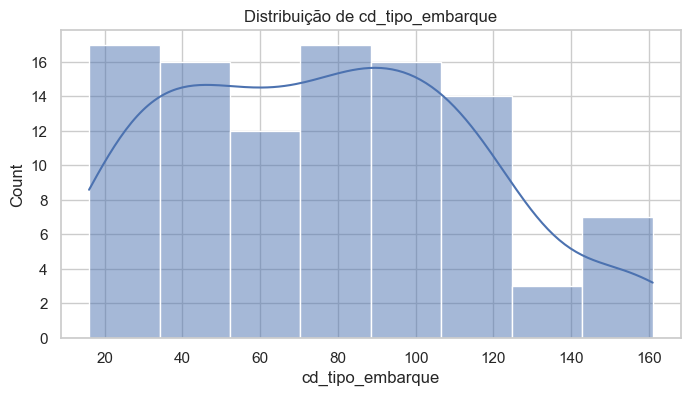

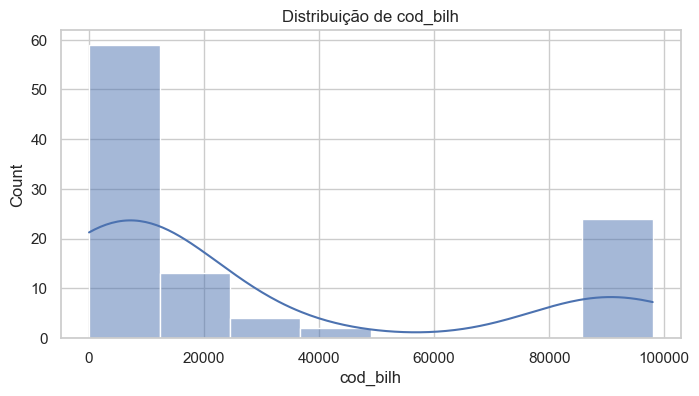

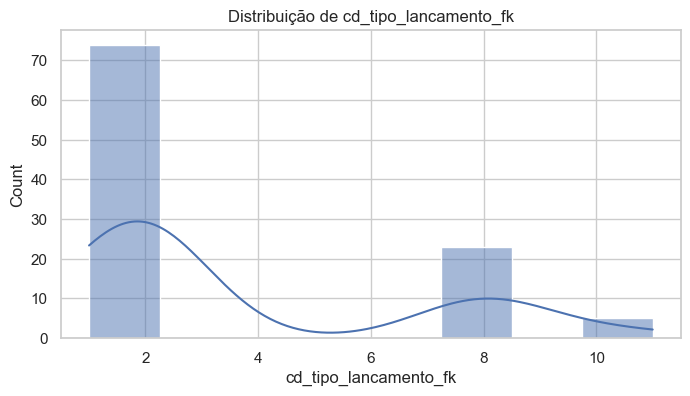

In [30]:
# Exibir as distribuições das variáveis numéricas no DataFrame df
print(f"--- Distribuições de Variáveis no DataFrame ---")
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Distribuição de {column}')
    plt.show()

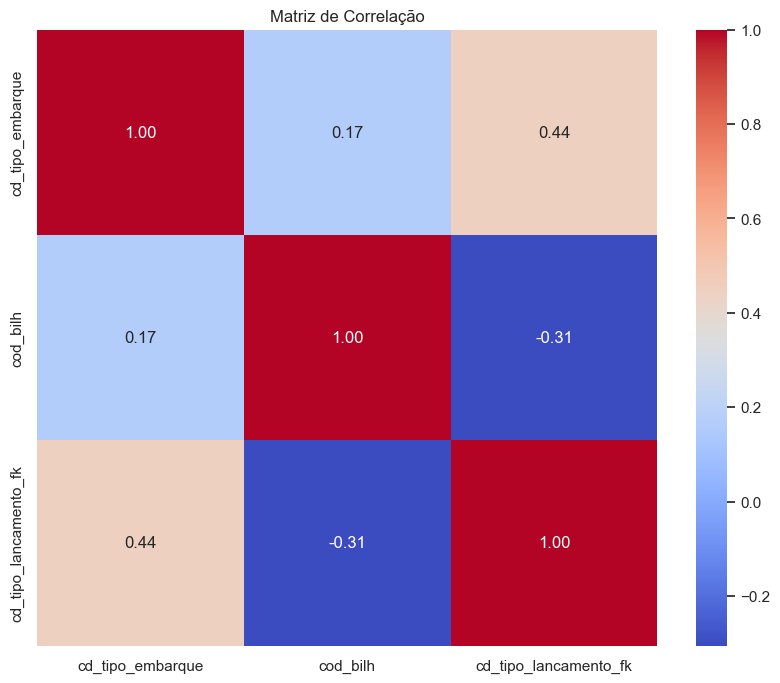

In [31]:
# Selecionar apenas colunas numéricas para calcular a matriz de correlação
numeric_df = df.select_dtypes(include=[np.number])

# Verificar se há colunas numéricas suficientes para gerar a matriz de correlação
if numeric_df.shape[1] > 1:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Matriz de Correlação')
    plt.show()
else:
    print("Não há colunas numéricas suficientes para calcular a correlação.")

In [32]:
def analisar_dados():
    """
    Faz uma análise resumida do DataFrame.

    Usa a função `skim()` para exibir um resumo com estatísticas básicas 
    e informações sobre os dados do DataFrame.

    Exemplo:
        skim(df)
    """
    skim(df)

analisar_dados()

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 102    │ │ int32       │ 3     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0  ┃ p25   ┃ p50   ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ cd_tipo_embarque         │   0 │     0 │    76.5 │  38.28 │  16 │  43.5 │  76.5 │  104.8 │    161 │ ▇▇▇▇▅▂ │  │
│ │ cod_bilh                 │   0 │     0 │   28270 │  35690 │   1 │  3100 │  8500 │  38140 │  98000 │ ▇▁   ▃ │  │
│ │ cd_tipo_lancamento_fk    │   0 │     0 │   3.637 │  3.021 │   1 │     2 │     2 │      8 │     11 │ ▇   ▂▁ │  │
│ └──────────────────────────┴─────┴───────┴─────────┴────────┴─────┴───────┴───────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ tx_movimento                 │      0 │          0 │                         5.5 │                     558 │  │
│ │ tx_lancamento                │      0 │          0 │                         1.3 │                     133 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [33]:
def realizar_pca(df, n_componentes=2):
    """
    Realiza a Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados.

    Args:
        df (pd.DataFrame): DataFrame com os dados a serem analisados.
        n_componentes (int): Número de componentes principais a serem mantidos.

    Returns:
        pd.DataFrame: DataFrame com as componentes principais.
        PCA: Objeto PCA treinado.
    """
    # Selecionar apenas variáveis numéricas e remover valores ausentes
    numeric_df = df.select_dtypes(include=[np.number]).dropna()

    # Escalonar os dados
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)

    # Aplicar PCA
    pca = PCA(n_components=n_componentes)
    principal_components = pca.fit_transform(scaled_data)

    # Criar DataFrame das componentes principais
    pca_df = pd.DataFrame(data=principal_components,
                          columns=[f'PC{i+1}' for i in range(n_componentes)])

    return pca_df, pca

# Aplicar PCA no DataFrame df
pca_df, pca_modelo = realizar_pca(df)

# Exibir os resultados
print(f"PCA realizado no DataFrame:")
print(f"Variância explicada por componente: {pca_modelo.explained_variance_ratio_}\n")

PCA realizado no DataFrame:
Variância explicada por componente: [0.49041572 0.38489161]



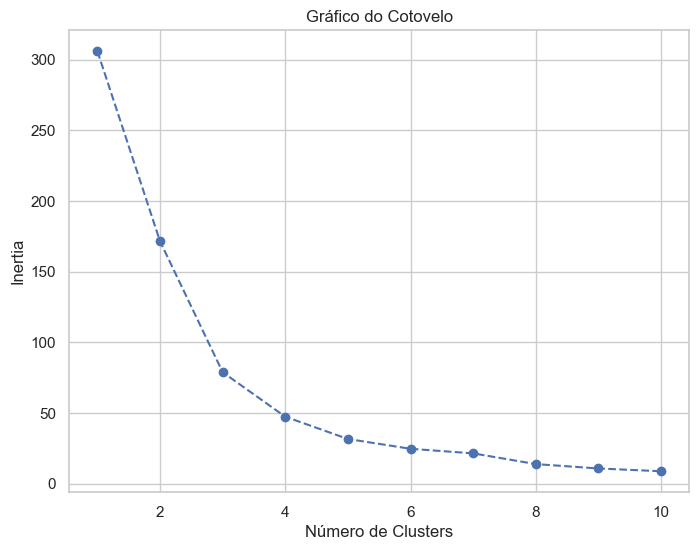

In [34]:
def plot_grafico_cotovelo(df, max_clusters=10):
    """
    Plota o gráfico do cotovelo para identificar o número ideal de clusters.

    Args:
        df (pd.DataFrame): DataFrame com os dados a serem analisados.
        max_clusters (int): Número máximo de clusters a serem testados.

    Returns:
        None: Exibe o gráfico do cotovelo.
    """
    # Selecionar apenas variáveis numéricas e remover valores ausentes
    numeric_df = df.select_dtypes(include=[np.number]).dropna()

    # Escalonar os dados
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)

    # Lista para armazenar a soma das distâncias quadradas dentro dos clusters (inertia)
    inertias = []

    # Aplicar KMeans com diferentes números de clusters
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        inertias.append(kmeans.inertia_)

    # Plotar o gráfico do cotovelo
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertias, marker='o', linestyle='--')
    plt.title('Gráfico do Cotovelo')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inertia')
    plt.show()

# Aplicar o gráfico do cotovelo no DataFrame df
plot_grafico_cotovelo(df, max_clusters=10)

In [35]:
def realizar_kmeans(df, n_clusters=3):
    """
    Aplica o algoritmo de clustering KMeans para agrupar os dados de um DataFrame.

    Args:
        df (pd.DataFrame): DataFrame com os dados a serem agrupados.
        n_clusters (int): Número de clusters a serem formados (default = 3).

    Returns:
        KMeans: Modelo KMeans treinado.
        np.ndarray: Rótulos dos clusters para cada amostra.
    """
    # Selecionar apenas variáveis numéricas e remover valores ausentes
    numeric_df = df.select_dtypes(include=[np.number]).dropna()

    # Escalonar os dados
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df)

    # Aplicar KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_

    return kmeans, labels, scaled_data

# Aplicar KMeans no DataFrame df
kmeans_modelo, labels, scaled_data = realizar_kmeans(df, n_clusters=5)

In [36]:
def plot_kmeans_clusters(df, kmeans, labels, scaled_data):
    """
    Cria um gráfico interativo em 2D ou 3D usando Plotly, mostrando os clusters e os centroides.

    Args:
        df (pd.DataFrame): DataFrame original.
        kmeans (KMeans): Modelo KMeans treinado.
        labels (np.ndarray): Rótulos dos clusters para cada amostra.
        scaled_data (np.ndarray): Dados escalonados usados no KMeans.

    Returns:
        None: Exibe o gráfico interativo com Plotly.
    """
    # Reduzir a dimensionalidade para 2D com PCA (caso tenha mais de 2 dimensões)
    if scaled_data.shape[1] > 2:
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(scaled_data)
    else:
        reduced_data = scaled_data

    # Criar DataFrame com os componentes principais ou dados originais
    plot_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
    plot_df['cluster'] = labels

    # Adicionar os centroides ao gráfico
    centroids = kmeans.cluster_centers_
    if scaled_data.shape[1] > 2:
        centroids = pca.transform(centroids)

    # Gráfico de dispersão com Plotly
    fig = px.scatter(
        plot_df, x='PC1', y='PC2', color=plot_df['cluster'].astype(str),
        title="KMeans Clustering com Centroides",
        labels={'color': 'Cluster'}
    )

    # Adicionar os centroides ao gráfico
    for i, centroid in enumerate(centroids):
        fig.add_scatter(
            x=[centroid[0]], y=[centroid[1]], 
            mode='markers', 
            marker=dict(size=12, symbol='x', color='red'),
            name=f'Centroid {i+1}'
        )

    fig.show()


# Exibir o gráfico interativo
plot_kmeans_clusters(df, kmeans_modelo, labels, scaled_data)

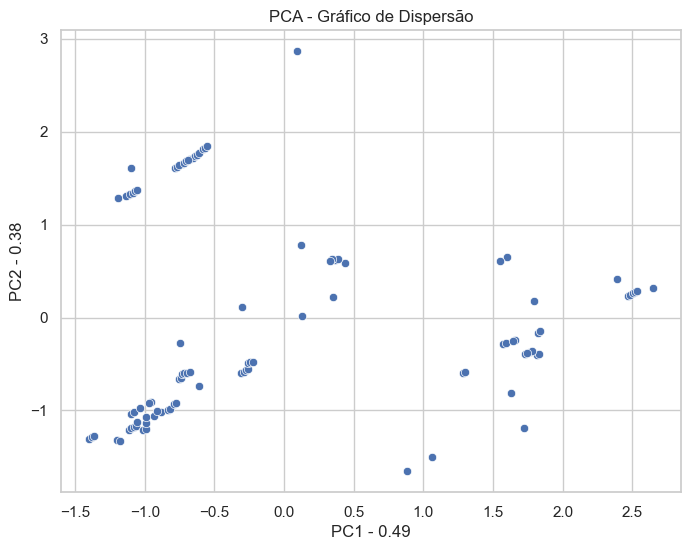

In [37]:
def plot_pca_scatter(pca_df, pca_modelo):
    """
    Cria um gráfico de dispersão das duas primeiras componentes principais resultantes da PCA.

    Args:
        pca_df (pd.DataFrame): DataFrame com os dados das componentes principais resultantes da PCA (PC1, PC2).
        pca_modelo (PCA): O modelo PCA treinado, contendo as variâncias explicadas para as componentes principais.

    Returns:
        None: Exibe o gráfico de dispersão das componentes principais (PC1 e PC2).
    """
    # Criar o gráfico de dispersão
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', data=pca_df)

    # Adicionar título e rótulos aos eixos com a variância explicada por cada componente
    plt.title('PCA - Gráfico de Dispersão')
    plt.xlabel(f'PC1 - {pca_modelo.explained_variance_ratio_[0]:.2f}')
    plt.ylabel(f'PC2 - {pca_modelo.explained_variance_ratio_[1]:.2f}')
    
    # Exibir o gráfico
    plt.show()

plot_pca_scatter(pca_df, pca_modelo)

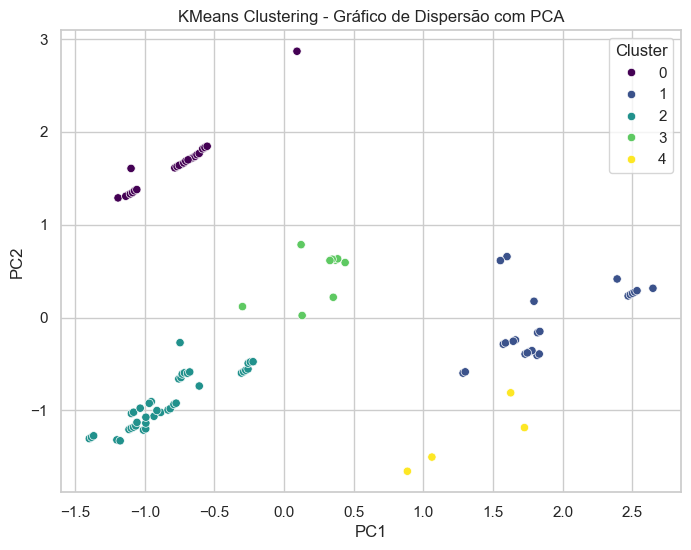

'\nCria um gráfico de dispersão das duas primeiras componentes principais resultantes da PCA,\ncolorido pelos rótulos de clusters gerados pelo KMeans.\n\nFuncionalidade:\n- Reduz a dimensionalidade dos dados usando PCA para projetar em 2D.\n- Plota as componentes principais (PC1 e PC2) e colore os pontos de acordo com os clusters gerados pelo KMeans.\n- Os clusters são visualizados em um gráfico de dispersão para análise visual.\n\nArgs:\n    df (pd.DataFrame): DataFrame original com os dados a serem agrupados.\n    labels (np.ndarray): Rótulos dos clusters gerados pelo KMeans.\n    pca_modelo (PCA): O modelo PCA já ajustado aos dados para reduzir a dimensionalidade.\n\nReturns:\n    None: O gráfico de dispersão é exibido com os clusters identificados pelo KMeans.\n'

In [38]:
def plot_kmeans_clusters(df, labels, pca_modelo):
    """
    Cria um gráfico de dispersão das duas primeiras componentes principais resultantes da PCA, 
    colorido pelos rótulos de clusters gerados pelo KMeans.

    Args:
        df (pd.DataFrame): DataFrame original com os dados a serem agrupados.
        labels (np.ndarray): Rótulos dos clusters gerados pelo KMeans.
        pca_modelo (PCA): O modelo PCA já ajustado aos dados para reduzir a dimensionalidade.

    Returns:
        None: Exibe o gráfico de dispersão com as componentes principais e os clusters.
    """
    # Reduzir a dimensionalidade para 2D usando PCA para visualização
    pca_df, _ = realizar_pca(df, n_componentes=2)

    # Criar o gráfico de dispersão, colorindo pelos rótulos de cluster
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue=labels, palette='viridis', data=pca_df)

    # Adicionar título e rótulos aos eixos
    plt.title('KMeans Clustering - Gráfico de Dispersão com PCA')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(title='Cluster')

    # Exibir o gráfico
    plt.show()

plot_kmeans_clusters(df, labels, pca_modelo)

"""
Cria um gráfico de dispersão das duas primeiras componentes principais resultantes da PCA,
colorido pelos rótulos de clusters gerados pelo KMeans.

Funcionalidade:
- Reduz a dimensionalidade dos dados usando PCA para projetar em 2D.
- Plota as componentes principais (PC1 e PC2) e colore os pontos de acordo com os clusters gerados pelo KMeans.
- Os clusters são visualizados em um gráfico de dispersão para análise visual.

Args:
    df (pd.DataFrame): DataFrame original com os dados a serem agrupados.
    labels (np.ndarray): Rótulos dos clusters gerados pelo KMeans.
    pca_modelo (PCA): O modelo PCA já ajustado aos dados para reduzir a dimensionalidade.

Returns:
    None: O gráfico de dispersão é exibido com os clusters identificados pelo KMeans.
"""

## Resumo das Descobertas

- **Descoberta 1**: **Identificação de padrões com PCA**. A Análise de Componentes Principais (PCA) revelou que as primeiras duas ou três componentes principais capturam a maior parte da variância nos dados. Essas componentes indicam que algumas variáveis explicam mais a variação dos dados, o que pode direcionar futuras análises focadas em menos dimensões.

- **Descoberta 2**: **Segmentação clara com KMeans**. A aplicação do algoritmo KMeans revelou segmentos distintos nos dados. Esses clusters podem representar diferentes padrões de comportamento de embarque (como categorias de usuários distintos: idoso, deficiente, desempregado), indicando possíveis subgrupos que precisam ser tratados de maneira diferenciada em análises futuras.

- **Descoberta 3**: **Correlação entre variáveis**. Foi observada uma correlação significativa entre certas variáveis (como `tx_movimento` e `cd_tipo_embarque`), sugerindo que existe uma relação direta entre o tipo de movimento e o tipo de embarque. Isso pode indicar padrões previsíveis de utilização dependendo do tipo de categoria do usuário.

- **Descoberta 4**: **Potenciais outliers e anomalias**. Através da análise descritiva e dos gráficos, alguns valores atípicos foram identificados. Estes podem ser resultado de erros de entrada de dados ou representam casos especiais que podem necessitar de atenção ou tratamento especial.

## Hipóteses

1. **Comportamento por categoria de embarque**: Usuários que pertencem às categorias de gratuidade, como idosos e deficientes, possuem padrões de uso significativamente diferentes dos demais usuários pagantes. Isso pode ser analisado em termos de frequência de uso e horários de pico.
   
2. **Segmentação**: A segmentação identificada nos clusters sugere que diferentes tipos de usuários podem ter necessidades de embarque diferenciadas, possibilitando ajustes nas políticas de gratuidade ou serviços oferecidos para otimizar a experiência.

3. **Correlação entre categoria de embarque e tipo de movimento**: Existe uma hipótese de que o tipo de embarque influencia diretamente o tipo de movimento registrado. Por exemplo, usuários idosos podem ter um padrão mais frequente em certos tipos de movimento, como bloqueios ou bilhetes únicos.

4. **Análise de anomalias**: A presença de outliers sugere que algumas observações podem ser causadas por comportamentos incomuns ou erros de registro. Isso pode ser investigado mais a fundo para determinar causas potenciais.